In [4]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [14]:


# Создаем новое изображение с RGB режимом, размером 256x256 и белым цветом
img = Image.new('RGB', (256, 256), color = (255, 255, 255))

# Создаем объект ImageDraw
d = ImageDraw.Draw(img)

# Устанавливаем текст и шрифт (файл шрифта должен находиться в той же директории, что и ваш Python скрипт)
text = "SomeThing"
font = ImageFont.truetype("fonts/Brass Mono/BrassMono-Italic.ttf",128)

# Рассчитываем ширину и высоту текста
w, h = d.textsize(text, font)

# Рассчитываем координаты x,y текста
x, y = (img.width - w) / 2, (img.height - h) / 2

# Добавляем текст на изображение
d.text((x, y), text, fill=(0, 0, 0), font=font)

# Сохраняем изображение
img.save('text_image.png')


# Выводим сообщение об успехе
print("Текст был успешно добавлен на изображение и сохранен как text_image.png")

Текст был успешно добавлен на изображение и сохранен как text_image.png


/var/folders/4y/zccbjjq17fgd73999h5g3ltr0000gn/T/ipykernel_62437/1016873441.py:12: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = d.textsize(text, font)


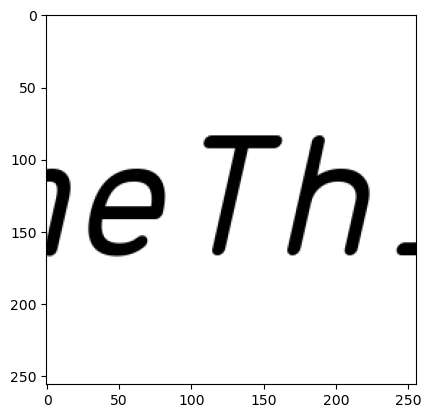

In [15]:
# Выводим изображение
plt.imshow(img)
plt.show()

In [22]:
! pip install wand
! pip install MagickWand

  Preparing metadata (setup.py) ... done
  Created wheel for MagickWand: filename=magickwand-0.2-py3-none-any.whl size=32440 sha256=cd12ec1984f7b6e19d2a138f7ada7f527c684e894048799ecc0819a8772e06cb
  Stored in directory: /Users/maxsemakov/Library/Caches/pip/wheels/75/35/f3/8b676dfbb4a082477455bc07d473a002e331681074fceac3f8
Successfully built MagickWand


In [23]:
from wand.image import Image
from wand.drawing import Drawing
from wand.color import Color

with Image(filename='input.png') as img:
    with Drawing() as draw:
        draw.font = 'fonts/Brass Mono/BrassMono-Italic.ttf'  # Укажите путь к вашему файлу шрифта
        draw.font_size = 30
        draw.text_alignment = 'center'
        draw.text(img.width // 2, img.height // 2, 'Ваш текст')
        draw(img)
    img.save(filename='output.png')


ImportError: MagickWand shared library not found.
You probably had not installed ImageMagick library.
Try to install:
  brew install freetype imagemagick